# Visualization A to Z

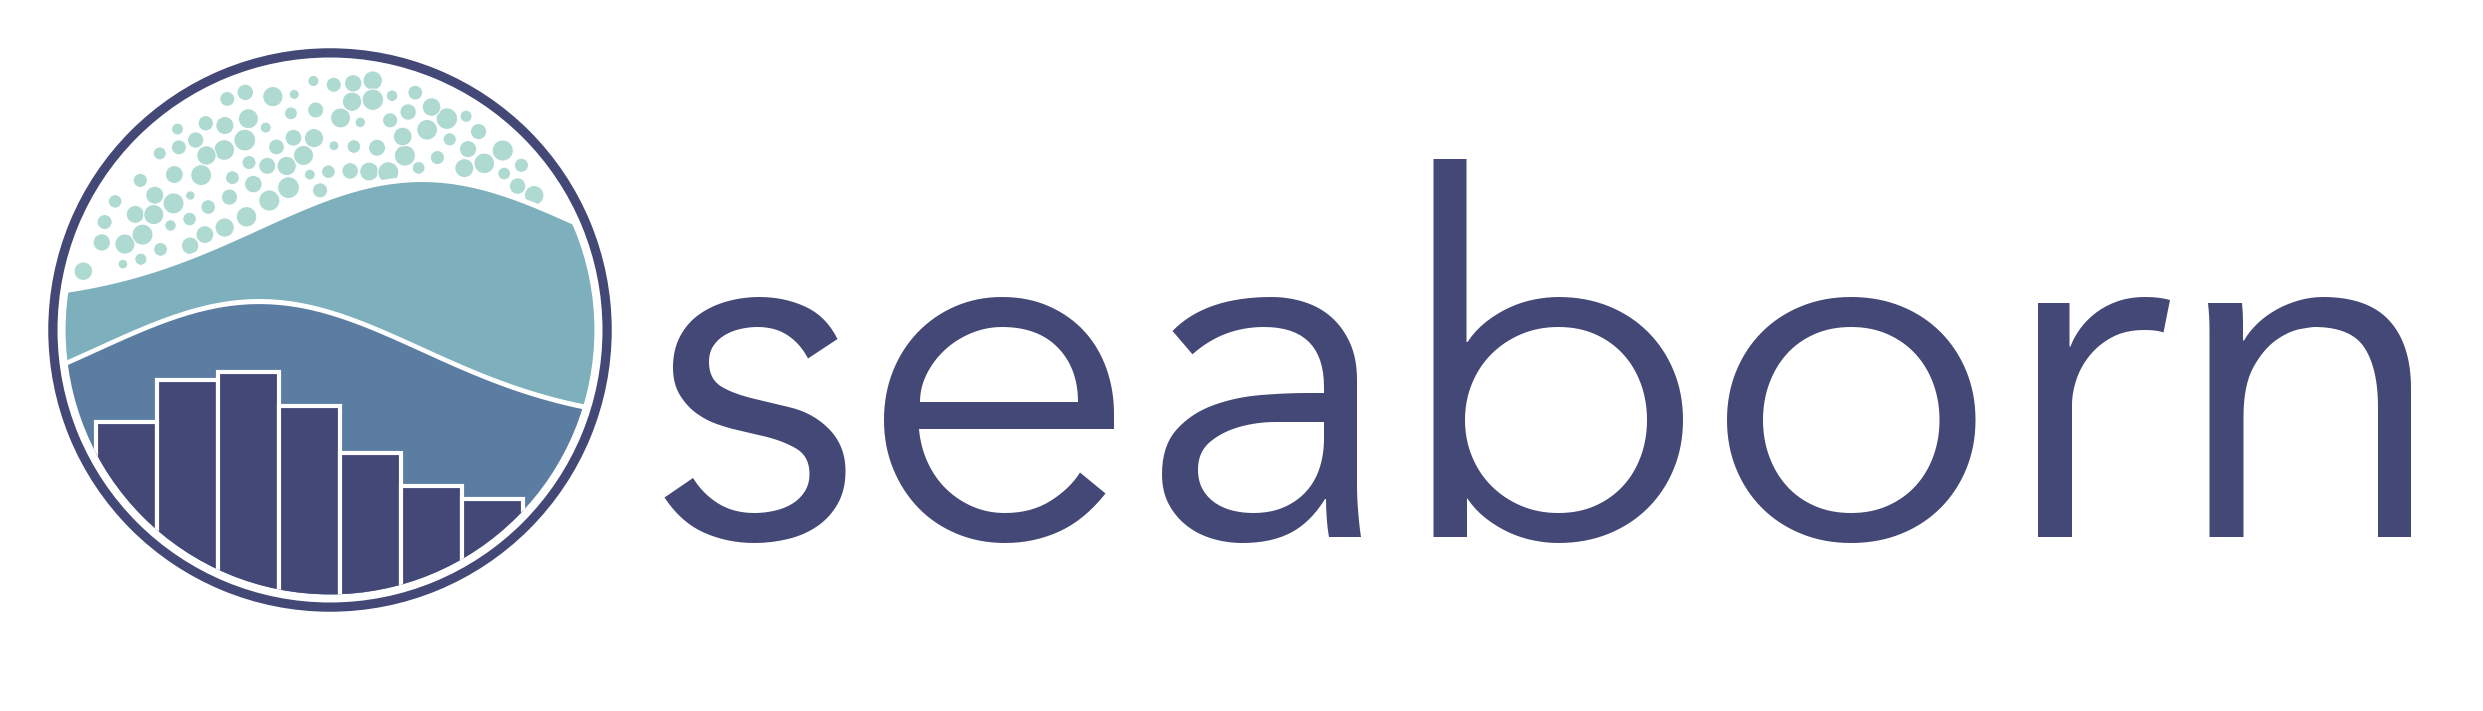

About Seaborn : 

Seaborn is a Python data visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn 링크 : https://seaborn.pydata.org/examples/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Scatter plot

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


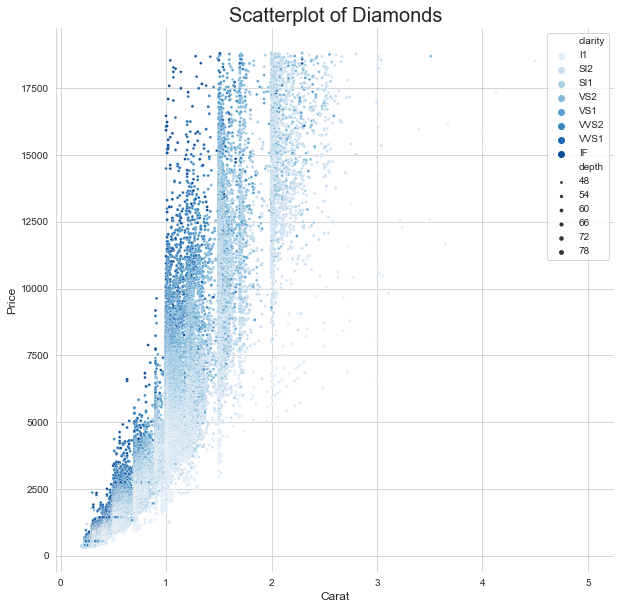

In [4]:
sns.set_style('whitegrid')

plt.figure(figsize = (10,10))
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", 
                size="depth",
                palette= 'Blues',
                hue_order=clarity_ranking,
                sizes = (1,15),
                data=diamonds)
sns.despine(left = False, bottom = True)
plt.title('Scatterplot of Diamonds', size = 20)
plt.xlabel('Carat', size = 12)
plt.ylabel('Price', size =12)
plt.legend(loc = 'upper right') # best,lower right ect
plt.show()

### Cat plot

In [5]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Figure size 576x576 with 0 Axes>

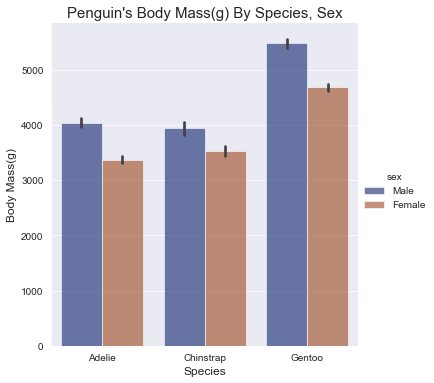

In [15]:
plt.figure(figsize = (8,8))
sns.catplot(data=penguins, 
            kind="bar",
            x="species", y="body_mass_g", 
            hue="sex", # ci : confidence interval (sd) 
            palette="dark", 
            alpha=.6)
plt.title("Penguin's Body Mass(g) By Species, Sex", size = 15)
plt.xlabel('Species', size= 12)
plt.ylabel('Body Mass(g)', size = 12)
plt.show()

###  Violin Plot

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


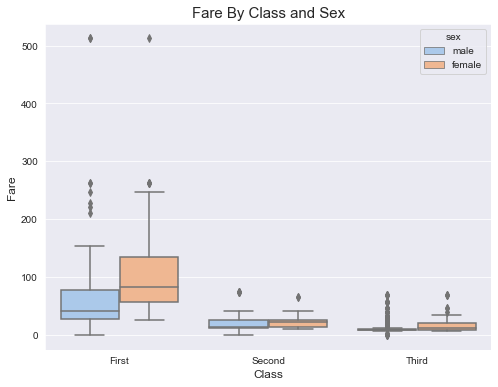

In [11]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))
sns.boxplot(data = titanic, 
               x = 'class', 
               y ='fare',
               hue = 'sex', 
               palette = 'pastel')
plt.title('Fare By Class and Sex', size = 15)
plt.xlabel('Class', size = 12)
plt.ylabel('Fare', size = 12)
plt.show()

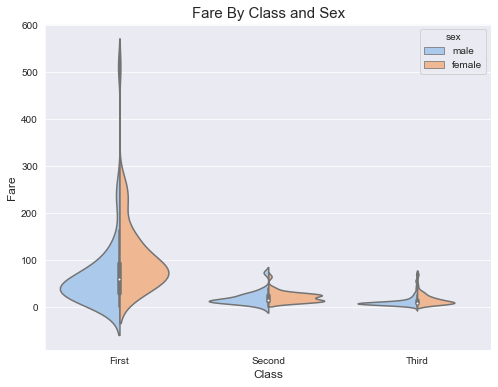

In [17]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))
sns.violinplot(data = titanic, 
               x = 'class', 
               y ='fare',
               hue = 'sex', 
               split = True,
               palette = 'pastel')
plt.title('Fare By Class and Sex', size = 15)
plt.xlabel('Class', size = 12)
plt.ylabel('Fare', size = 12)
plt.show()

### HeatMap

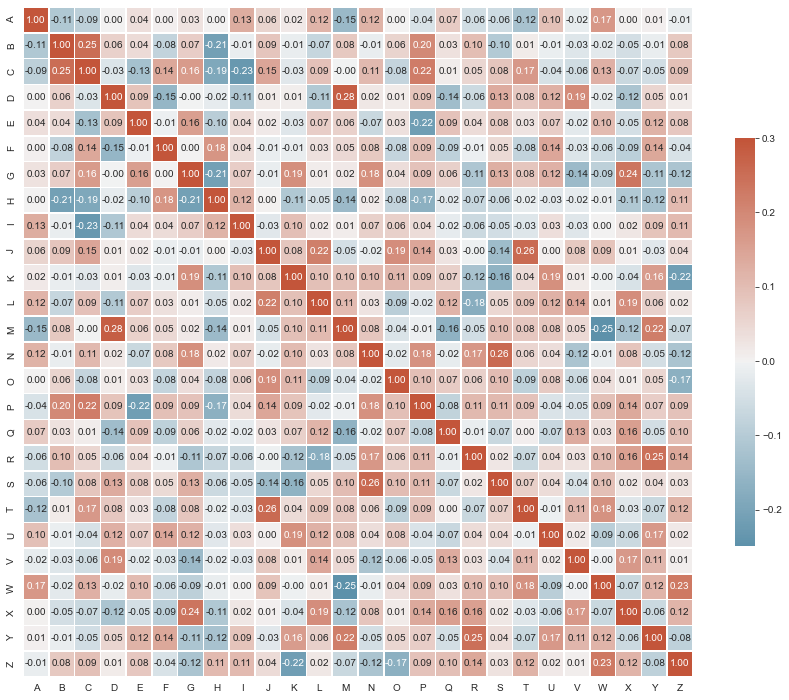

In [19]:
from string import ascii_letters

rs = np.random.RandomState(33) # 난수 생성
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

plt.figure(figsize = (15,15))
corr = d.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            cmap=cmap, 
            vmax=0.3, 
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt = '.2f',
            cbar_kws={"shrink": .5})
plt.show()